<a href="https://colab.research.google.com/github/Aayush6377/Machine-Learning-Lab-programs-Sem-6/blob/main/Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Write a Python Program to implement Random Forest**

In [21]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
#Load dataset
df=pd.read_csv('/content/titanic.csv')
df.dropna(subset='Survived',inplace=True)
print(df.iloc[:,:3])

     PassengerId  Survived  Pclass
0              1         0       3
1              2         1       1
2              3         1       3
3              4         1       1
4              5         0       3
..           ...       ...     ...
886          887         0       2
887          888         1       1
888          889         0       3
889          890         1       1
890          891         0       3

[891 rows x 3 columns]


In [13]:
#Features and target variable
x=df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y=df['Survived']
x.loc[:, 'Sex'] = x['Sex'].map({'female': 0, 'male': 1})
x.loc[:, 'Age'].fillna(x['Age'].median(), inplace=True)
print(x)

     Pclass Sex   Age  SibSp  Parch     Fare
0         3   1  22.0      1      0   7.2500
1         1   0  38.0      1      0  71.2833
2         3   0  26.0      0      0   7.9250
3         1   0  35.0      1      0  53.1000
4         3   1  35.0      0      0   8.0500
..      ...  ..   ...    ...    ...      ...
886       2   1  27.0      0      0  13.0000
887       1   0  19.0      0      0  30.0000
888       3   0  28.0      1      2  23.4500
889       1   1  26.0      0      0  30.0000
890       3   1  32.0      0      0   7.7500

[891 rows x 6 columns]


In [14]:
#Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
#Training the model using Random Forest classifier
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
#Make predictions
y_pred=model.predict(x_test)
print("Actual values: ",np.array(y_test)[:10])
print("Predicted values: ",y_pred[:10])

Actual values:  [1 0 0 1 1 1 1 0 1 1]
Predicted values:  [0 0 0 1 0 1 1 0 1 1]


In [30]:
#Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy:", round(accuracy,2))
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



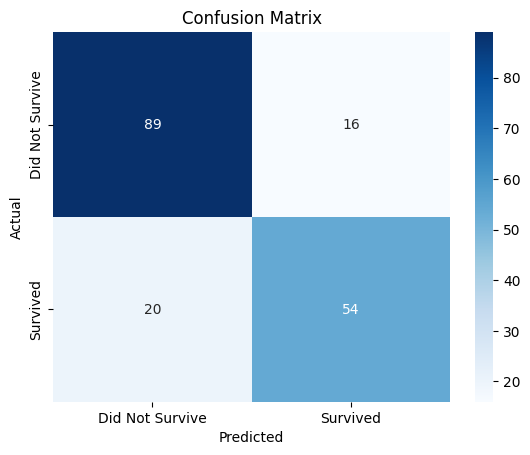

In [31]:
#Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Did Not Survive", "Survived"], yticklabels=["Did Not Survive", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

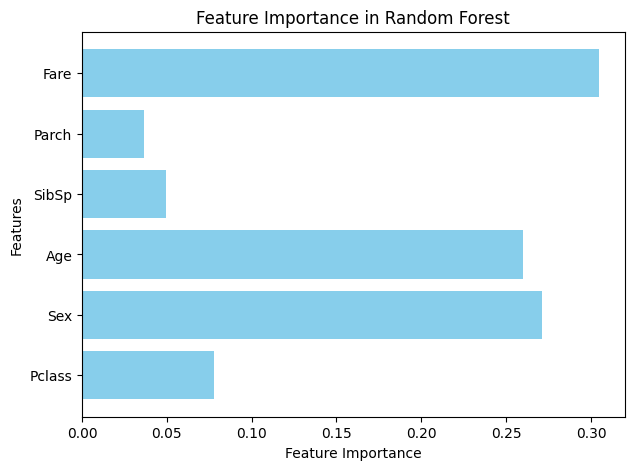

In [32]:
# Feature importance visualization
imp=model.feature_importances_
plt.figure(figsize=(7, 5))
plt.barh(x.columns, imp, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()